In [1]:
import numpy as np

N_SAMPLES = int(10**6)
RANDOM_SEED = 42

rng = np.random.RandomState(RANDOM_SEED)

In [2]:
from sklearn.datasets import make_classification

def generate_data(num_samples, prevalence=0.5, sensitive_prevalence=0.1, random_seed=42):
    
    # Generate features and labels with scikit-learn
    X, Y = make_classification(num_samples, weights=(1-prevalence, prevalence), random_state=random_seed)
    
    # Sensitive attrs
    rng = np.random.RandomState(random_seed)
    S = (rng.random(num_samples) + sensitive_prevalence).astype(int)

    return X, Y, S

In [3]:
X, Y, S = generate_data(num_samples=N_SAMPLES, random_seed=rng.randint(10**10))

In [4]:
# Split train, test
test_size = 0.2

indices = rng.permutation(N_SAMPLES)
test_indices = indices[: int(test_size * N_SAMPLES)]
train_indices = indices[int(test_size * N_SAMPLES): ]

X_train, y_train, s_train = X[train_indices], Y[train_indices], S[train_indices]
X_test, y_test, s_test = X[test_indices], Y[test_indices], S[test_indices]

# Use hpt package to train models

In [5]:
from pathlib import Path
HYPERPARAM_SPACE_PATH = Path() / 'hyperparameter_spaces'
HYPERPARAM_SPACE_PATH = HYPERPARAM_SPACE_PATH / 'sklearn.multiple_algorithms.yaml'

In [6]:
from hpt.tuner import ObjectiveFunction, OptunaTuner

obj_func = ObjectiveFunction(
    X_train, y_train, X_test, y_test,
    hyperparameter_space=HYPERPARAM_SPACE_PATH,
    eval_metric='accuracy',
    s_train=s_train,
    s_val=s_test,
    ppr=0.10,
    #threshold=0.50,
)

tuner = OptunaTuner(obj_func) # NOTE: can pass other useful study kwargs here (e.g. storage)

[I 2022-11-30 13:33:24,105] A new study created in memory with name: no-name-ba29324f-6fc3-4987-8830-c94499d5749d


In [7]:
%%time
tuner.optimize(n_trials=100, show_progress_bar=True, n_jobs=4)

/Users/acruz/opt/miniconda3/envs/py3.8-hpt/lib/python3.8/site-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-11-30 13:33:24,692] Trial 1 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.0005600777446058578, 'learner_LR_max_iter': 127, 'learner_LR_solver': 'liblinear'}. Best is trial 1 with value: 0.596095.


[I 2022-11-30 13:33:25,398] Trial 4 finished with value: 0.595935 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.001, 'learner_LR_tol': 0.0050523984601390124, 'learner_LR_max_iter': 791, 'learner_LR_solver': 'liblinear'}. Best is trial 4 with value: 0.595935.


[I 2022-11-30 13:33:29,703] Trial 2 finished with value: 0.597815 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 16, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 5, 'learner_DT_min_samples_leaf': 38, 'learner_DT_splitter': 'best'}. Best is trial 4 with value: 0.595935.


[I 2022-11-30 13:33:31,028] Trial 6 finished with value: 0.595935 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.001, 'learner_LR_tol': 0.0026396099452780618, 'learner_LR_max_iter': 101, 'learner_LR_solver': 'liblinear'}. Best is trial 4 with value: 0.595935.


[I 2022-11-30 13:33:32,370] Trial 0 finished with value: 0.595345 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 147, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 3, 'learner_DT_min_samples_leaf': 7, 'learner_DT_splitter': 'best'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:33:34,108] Trial 8 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1, 'learner_LR_tol': 0.001620873418556492, 'learner_LR_max_iter': 571, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:33:40,252] Trial 7 finished with value: 0.598235 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 38, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 68, 'learner_DT_min_samples_leaf': 22, 'learner_DT_splitter': 'best'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:33:44,252] Trial 10 finished with value: 0.598585 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 6, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 3, 'learner_DT_min_samples_leaf': 19, 'learner_DT_splitter': 'best'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:00,125] Trial 11 finished with value: 0.598685 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 81, 'learner_RF_max_depth': 46, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 26, 'learner_RF_min_samples_leaf': 31, 'learner_RF_max_features': 'log2'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:02,151] Trial 12 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1, 'learner_LR_tol': 8.510449835075657e-05, 'learner_LR_max_iter': 809, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:06,419] Trial 13 finished with value: 0.598705 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 35, 'learner_RF_max_depth': 5, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 22, 'learner_RF_min_samples_leaf': 5, 'learner_RF_max_features': 'sqrt'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:14,993] Trial 14 finished with value: 0.598425 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 28, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 46, 'learner_DT_min_samples_leaf': 71, 'learner_DT_splitter': 'best'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:16,777] Trial 15 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.01, 'learner_LR_tol': 0.00011728936730892757, 'learner_LR_max_iter': 87, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:19,397] Trial 16 finished with value: 0.598835 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 18, 'learner_RF_max_depth': 6, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 92, 'learner_RF_min_samples_leaf': 87, 'learner_RF_max_features': 'sqrt'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:20,923] Trial 17 finished with value: 0.595935 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.001, 'learner_LR_tol': 0.0003602455355764923, 'learner_LR_max_iter': 4203, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:23,441] Trial 18 finished with value: 0.598665 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 9, 'learner_RF_max_depth': 45, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 109, 'learner_RF_min_samples_leaf': 53, 'learner_RF_max_features': 'sqrt'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:24,330] Trial 19 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.005009073429541113, 'learner_LR_max_iter': 1492, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:25,911] Trial 20 finished with value: 0.595965 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.01, 'learner_LR_tol': 0.003013757014389276, 'learner_LR_max_iter': 742, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:37,422] Trial 21 finished with value: 0.596135 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 54, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 12, 'learner_DT_min_samples_leaf': 11, 'learner_DT_splitter': 'best'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:34:39,029] Trial 22 finished with value: 0.595935 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.001, 'learner_LR_tol': 7.047641951545443e-05, 'learner_LR_max_iter': 2333, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:35:09,006] Trial 23 finished with value: 0.598835 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 154, 'learner_RF_max_depth': 22, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 62, 'learner_RF_min_samples_leaf': 9, 'learner_RF_max_features': 'sqrt'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:35:10,039] Trial 24 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 7.821208668727584e-05, 'learner_LR_max_iter': 214, 'learner_LR_solver': 'liblinear'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:35:13,281] Trial 25 finished with value: 0.598875 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 14, 'learner_RF_max_depth': 12, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 5, 'learner_RF_min_samples_leaf': 14, 'learner_RF_max_features': 'log2'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:35:26,290] Trial 26 finished with value: 0.598875 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 59, 'learner_RF_max_depth': 50, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 4, 'learner_RF_max_features': 'sqrt'}. Best is trial 0 with value: 0.595345.


[I 2022-11-30 13:35:37,940] Trial 27 finished with value: 0.595085 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 65, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 13, 'learner_DT_min_samples_leaf': 8, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:35:39,830] Trial 28 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.0029631069605620943, 'learner_LR_max_iter': 648, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:36:20,079] Trial 29 finished with value: 0.598775 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 192, 'learner_RF_max_depth': 49, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 3, 'learner_RF_min_samples_leaf': 3, 'learner_RF_max_features': 'log2'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:36:31,575] Trial 30 finished with value: 0.595325 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 111, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 10, 'learner_DT_min_samples_leaf': 9, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:36:40,434] Trial 31 finished with value: 0.598625 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 35, 'learner_RF_max_depth': 32, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 5, 'learner_RF_max_features': 'sqrt'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:36:41,515] Trial 32 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.0004163735434306599, 'learner_LR_max_iter': 1316, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:36:51,784] Trial 33 finished with value: 0.596435 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 14, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 7, 'learner_DT_min_samples_leaf': 11, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:00,231] Trial 34 finished with value: 0.598865 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 30, 'learner_RF_max_depth': 20, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 19, 'learner_RF_min_samples_leaf': 92, 'learner_RF_max_features': 'log2'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:02,901] Trial 5 finished with value: 0.598775 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 1689, 'learner_RF_max_depth': 7, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 71, 'learner_RF_min_samples_leaf': 11, 'learner_RF_max_features': 'log2'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:03,869] Trial 36 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.00014930801617441642, 'learner_LR_max_iter': 916, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:05,328] Trial 37 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1, 'learner_LR_tol': 0.0018145514871426849, 'learner_LR_max_iter': 56, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:06,290] Trial 38 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.00012617792694094704, 'learner_LR_max_iter': 188, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:10,423] Trial 39 finished with value: 0.598205 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 9, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 27, 'learner_DT_min_samples_leaf': 21, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.
[I 2022-11-30 13:37:10,783] Trial 35 finished with value: 0.595655 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 130, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 25, 'learner_DT_min_samples_leaf': 5, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:11,819] Trial 40 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.0003520221928925579, 'learner_LR_max_iter': 3393, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:12,797] Trial 42 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.0023000009539676917, 'learner_LR_max_iter': 1632, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:23,579] Trial 43 finished with value: 0.595255 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 17, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 9, 'learner_DT_min_samples_leaf': 7, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:25,074] Trial 44 finished with value: 0.595965 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.01, 'learner_LR_tol': 0.0024564863802870266, 'learner_LR_max_iter': 1999, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:26,373] Trial 41 finished with value: 0.598815 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 109, 'learner_RF_max_depth': 12, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 46, 'learner_RF_min_samples_leaf': 9, 'learner_RF_max_features': 'sqrt'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:28,180] Trial 46 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1, 'learner_LR_tol': 7.80102132831576e-05, 'learner_LR_max_iter': 389, 'learner_LR_solver': 'liblinear'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:38,338] Trial 47 finished with value: 0.598425 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 18, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 8, 'learner_DT_min_samples_leaf': 57, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:37:44,271] Trial 48 finished with value: 0.598825 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 25, 'learner_RF_max_depth': 16, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 12, 'learner_RF_min_samples_leaf': 18, 'learner_RF_max_features': 'sqrt'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:38:04,948] Trial 45 finished with value: 0.598795 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 287, 'learner_RF_max_depth': 10, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 78, 'learner_RF_min_samples_leaf': 4, 'learner_RF_max_features': 'log2'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:40:50,263] Trial 50 finished with value: 0.598655 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 1412, 'learner_RF_max_depth': 5, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 81, 'learner_RF_max_features': 'log2'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:41:30,035] Trial 51 finished with value: 0.598805 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 261, 'learner_RF_max_depth': 8, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 34, 'learner_RF_max_features': 'log2'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:41:41,914] Trial 52 finished with value: 0.595235 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 39, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 31, 'learner_DT_min_samples_leaf': 2, 'learner_DT_splitter': 'best'}. Best is trial 27 with value: 0.595085.


[I 2022-11-30 13:41:54,694] Trial 53 finished with value: 0.593155 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 64, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 8, 'learner_DT_min_samples_leaf': 3, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:41:56,500] Trial 54 finished with value: 0.595965 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.01, 'learner_LR_tol': 0.0022845354303424547, 'learner_LR_max_iter': 201, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:42:01,577] Trial 55 finished with value: 0.598435 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 7, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 18, 'learner_DT_min_samples_leaf': 2, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:42:10,049] Trial 56 finished with value: 0.598435 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 21, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 7, 'learner_DT_min_samples_leaf': 79, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:42:17,341] Trial 57 finished with value: 0.598835 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 31, 'learner_RF_max_depth': 15, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 10, 'learner_RF_max_features': 'log2'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:42:25,983] Trial 58 finished with value: 0.598405 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 24, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 7, 'learner_DT_min_samples_leaf': 61, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:42:57,805] Trial 9 finished with value: 0.598725 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 4829, 'learner_RF_max_depth': 6, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 45, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:42:59,561] Trial 60 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.01, 'learner_LR_tol': 0.0006046408020814233, 'learner_LR_max_iter': 415, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:44:59,307] Trial 49 finished with value: 0.598625 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 2255, 'learner_RF_max_depth': 38, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 35, 'learner_RF_min_samples_leaf': 2, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:08,441] Trial 61 finished with value: 0.598795 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 1055, 'learner_RF_max_depth': 8, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 3, 'learner_RF_min_samples_leaf': 3, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:09,483] Trial 62 finished with value: 0.594805 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 150, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 15, 'learner_DT_min_samples_leaf': 6, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:10,649] Trial 64 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.004009399895178908, 'learner_LR_max_iter': 676, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:12,645] Trial 63 finished with value: 0.598575 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 6, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 14, 'learner_DT_min_samples_leaf': 41, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:18,496] Trial 66 finished with value: 0.598485 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 7, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 40, 'learner_DT_min_samples_leaf': 5, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:20,249] Trial 67 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1, 'learner_LR_tol': 0.002095937453499278, 'learner_LR_max_iter': 562, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:21,740] Trial 68 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.0001, 'learner_LR_tol': 7.737157275264528e-05, 'learner_LR_max_iter': 2022, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:23,260] Trial 69 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.0002755634875375105, 'learner_LR_max_iter': 2190, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:24,489] Trial 70 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.00011223979463360706, 'learner_LR_max_iter': 339, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:27,044] Trial 71 finished with value: 0.598735 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 12, 'learner_RF_max_depth': 9, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 21, 'learner_RF_min_samples_leaf': 99, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:35,521] Trial 72 finished with value: 0.598785 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 38, 'learner_RF_max_depth': 35, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 3, 'learner_RF_min_samples_leaf': 9, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:44,790] Trial 73 finished with value: 0.598495 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 134, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 30, 'learner_DT_min_samples_leaf': 65, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:54,683] Trial 74 finished with value: 0.597635 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 64, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 22, 'learner_DT_min_samples_leaf': 31, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:45:55,878] Trial 75 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.0001, 'learner_LR_tol': 0.0009545252068957808, 'learner_LR_max_iter': 209, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:46:05,444] Trial 76 finished with value: 0.597905 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 44, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 77, 'learner_DT_min_samples_leaf': 29, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:46:07,172] Trial 65 finished with value: 0.598665 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 463, 'learner_RF_max_depth': 7, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 14, 'learner_RF_max_features': 'log2'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:46:08,119] Trial 78 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.0001, 'learner_LR_tol': 0.00047663672163139614, 'learner_LR_max_iter': 107, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:46:09,282] Trial 79 finished with value: 0.595935 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.001, 'learner_LR_tol': 9.691698856014977e-05, 'learner_LR_max_iter': 232, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:46:12,521] Trial 77 finished with value: 0.596555 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 115, 'learner_DT_criterion': 'entropy', 'learner_DT_min_samples_split': 35, 'learner_DT_min_samples_leaf': 13, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:47:07,006] Trial 81 finished with value: 0.598895 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 396, 'learner_RF_max_depth': 9, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 16, 'learner_RF_min_samples_leaf': 2, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:47:20,312] Trial 82 finished with value: 0.596385 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 63, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 8, 'learner_DT_min_samples_leaf': 13, 'learner_DT_splitter': 'best'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:54:12,273] Trial 3 finished with value: 0.598725 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 7346, 'learner_RF_max_depth': 12, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 37, 'learner_RF_min_samples_leaf': 14, 'learner_RF_max_features': 'log2'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:54:17,956] Trial 84 finished with value: 0.598735 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 24, 'learner_RF_max_depth': 21, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 93, 'learner_RF_min_samples_leaf': 2, 'learner_RF_max_features': 'sqrt'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:54:19,985] Trial 85 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.0011626364105543736, 'learner_LR_max_iter': 102, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:54:22,146] Trial 86 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 6.249943201935948e-05, 'learner_LR_max_iter': 2834, 'learner_LR_solver': 'liblinear'}. Best is trial 53 with value: 0.593155.


[I 2022-11-30 13:54:33,458] Trial 87 finished with value: 0.585365 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 16, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 9, 'learner_DT_min_samples_leaf': 2, 'learner_DT_splitter': 'best'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:54:46,754] Trial 88 finished with value: 0.593875 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 25, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 5, 'learner_DT_min_samples_leaf': 6, 'learner_DT_splitter': 'best'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:54:48,276] Trial 89 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.007561413851391256, 'learner_LR_max_iter': 863, 'learner_LR_solver': 'liblinear'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:54:49,141] Trial 90 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.00922021320761643, 'learner_LR_max_iter': 153, 'learner_LR_solver': 'liblinear'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:54:50,111] Trial 91 finished with value: 0.596095 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 1e-05, 'learner_LR_tol': 0.0002931698569431824, 'learner_LR_max_iter': 159, 'learner_LR_solver': 'liblinear'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:54:51,704] Trial 92 finished with value: 0.595945 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.01, 'learner_LR_tol': 0.0010869726182060509, 'learner_LR_max_iter': 1934, 'learner_LR_solver': 'liblinear'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:55:03,999] Trial 93 finished with value: 0.597545 and parameters: {'learner_type': 'DT', 'learner_DT_max_depth': 143, 'learner_DT_criterion': 'gini', 'learner_DT_min_samples_split': 80, 'learner_DT_min_samples_leaf': 2, 'learner_DT_splitter': 'best'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:55:06,396] Trial 94 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.00010320458268006121, 'learner_LR_max_iter': 766, 'learner_LR_solver': 'liblinear'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:55:24,122] Trial 83 finished with value: 0.598765 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 2422, 'learner_RF_max_depth': 16, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 8, 'learner_RF_min_samples_leaf': 2, 'learner_RF_max_features': 'log2'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:55:55,673] Trial 96 finished with value: 0.598775 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 265, 'learner_RF_max_depth': 5, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 7, 'learner_RF_min_samples_leaf': 10, 'learner_RF_max_features': 'sqrt'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:55:57,681] Trial 97 finished with value: 0.595955 and parameters: {'learner_type': 'LR', 'learner_LR_penalty': 'l2', 'learner_LR_C': 0.1, 'learner_LR_tol': 0.008927088184438495, 'learner_LR_max_iter': 130, 'learner_LR_solver': 'liblinear'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:55:59,651] Trial 98 finished with value: 0.598805 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 5, 'learner_RF_max_depth': 33, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 82, 'learner_RF_min_samples_leaf': 67, 'learner_RF_max_features': 'log2'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:56:02,793] Trial 99 finished with value: 0.598725 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 15, 'learner_RF_max_depth': 12, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 3, 'learner_RF_min_samples_leaf': 2, 'learner_RF_max_features': 'log2'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 13:58:31,538] Trial 95 finished with value: 0.598735 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 1315, 'learner_RF_max_depth': 30, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 12, 'learner_RF_min_samples_leaf': 35, 'learner_RF_max_features': 'sqrt'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 14:03:46,306] Trial 59 finished with value: 0.598735 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 11554, 'learner_RF_max_depth': 11, 'learner_RF_criterion': 'gini', 'learner_RF_min_samples_split': 25, 'learner_RF_min_samples_leaf': 3, 'learner_RF_max_features': 'log2'}. Best is trial 87 with value: 0.585365.


[I 2022-11-30 14:12:49,984] Trial 80 finished with value: 0.598715 and parameters: {'learner_type': 'RF', 'learner_RF_n_estimators': 17204, 'learner_RF_max_depth': 24, 'learner_RF_criterion': 'entropy', 'learner_RF_min_samples_split': 2, 'learner_RF_min_samples_leaf': 4, 'learner_RF_max_features': 'log2'}. Best is trial 87 with value: 0.585365.
CPU times: user 6h 4min 23s, sys: 2min 15s, total: 6h 6min 39s
Wall time: 39min 25s


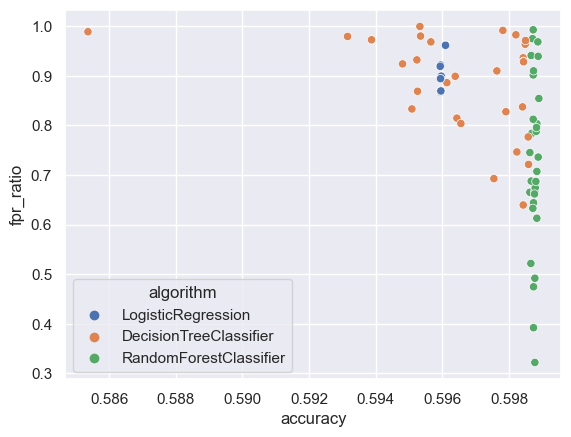

In [8]:
tuner.objective_function.plot(y_axis="fpr_ratio", hue="algorithm")